**Section I: Import the Data**

Imports and Read in File

In [37]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [5]:
df = pd.read_csv("../../assets/datasets/adult.csv")

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [24]:
df.dropna(axis = 0, inplace=True)
df.drop('education',axis = 1, inplace=True)
df.income = df.income.map({'small':1, 'large' : 0})
df.sex = df.sex.map({'Male':1, 'Female' : 0})

In [35]:
ndf = df._get_numeric_data()

Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

In [46]:
workclass_df = pd.get_dummies(df.workclass)
marital_df = pd.get_dummies(df['marital-status'])
occu_df = pd.get_dummies(df['occupation'])
relationship_df = pd.get_dummies(df['relationship'])
race_df = pd.get_dummies(df['race'])

Apply the functions you just wrote and append the results to the dataframe

**Section III: Examine the Data**

Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

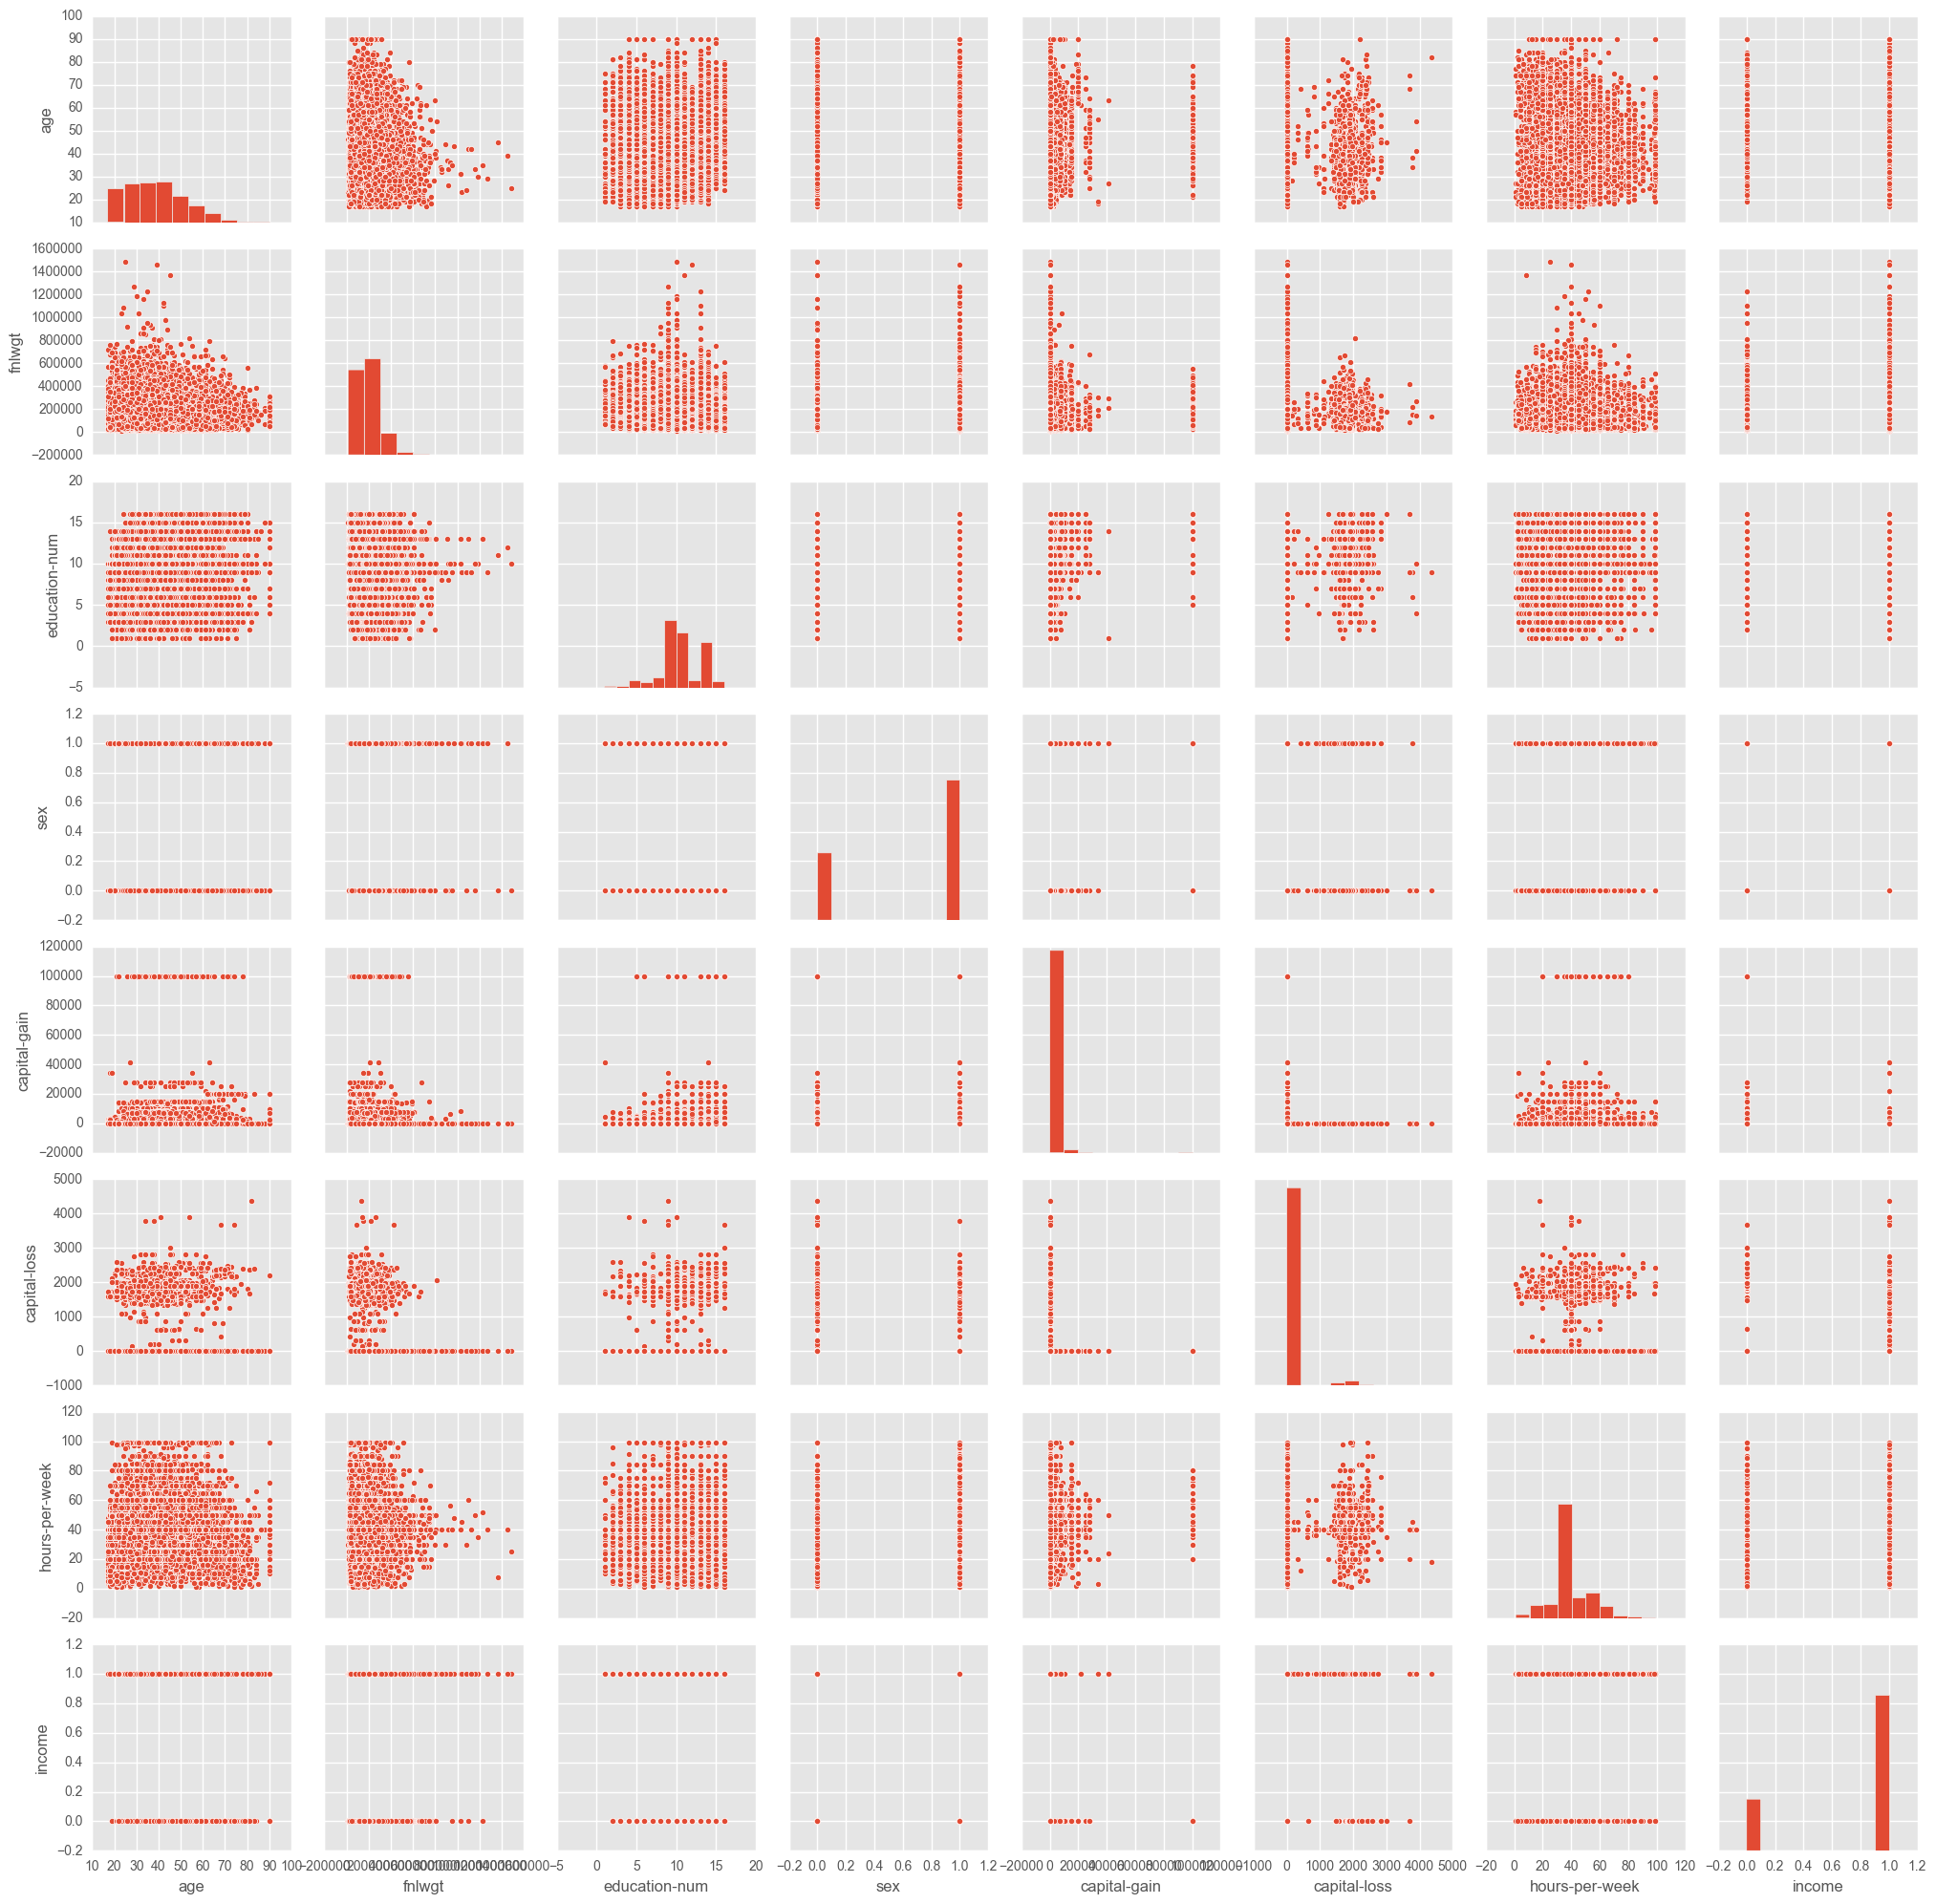

In [82]:
sns.pairplot(ndf)
plt.show()

**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

In [ ]:
data= pd.concat([ndf,workclass_df,marital_df,occu_df,relationship_df,race_df], axis=1, join_axes=[ndf.index])

Check for NaN and Infinite Numbers - Our data is messy!

In [ ]:
np.any(np.isnan(...))

In [ ]:
Convert to the Pandas Array to a Numpy Matrix - Your function will only take numerical inputs

In [50]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

X = SS.fit_transform(data)

**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

In [52]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Get the labels and centroids

In [57]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

data['label'] = labels

Compute the Silhoutte Score to measure your analysis

In [83]:
ndf['label'] = labels

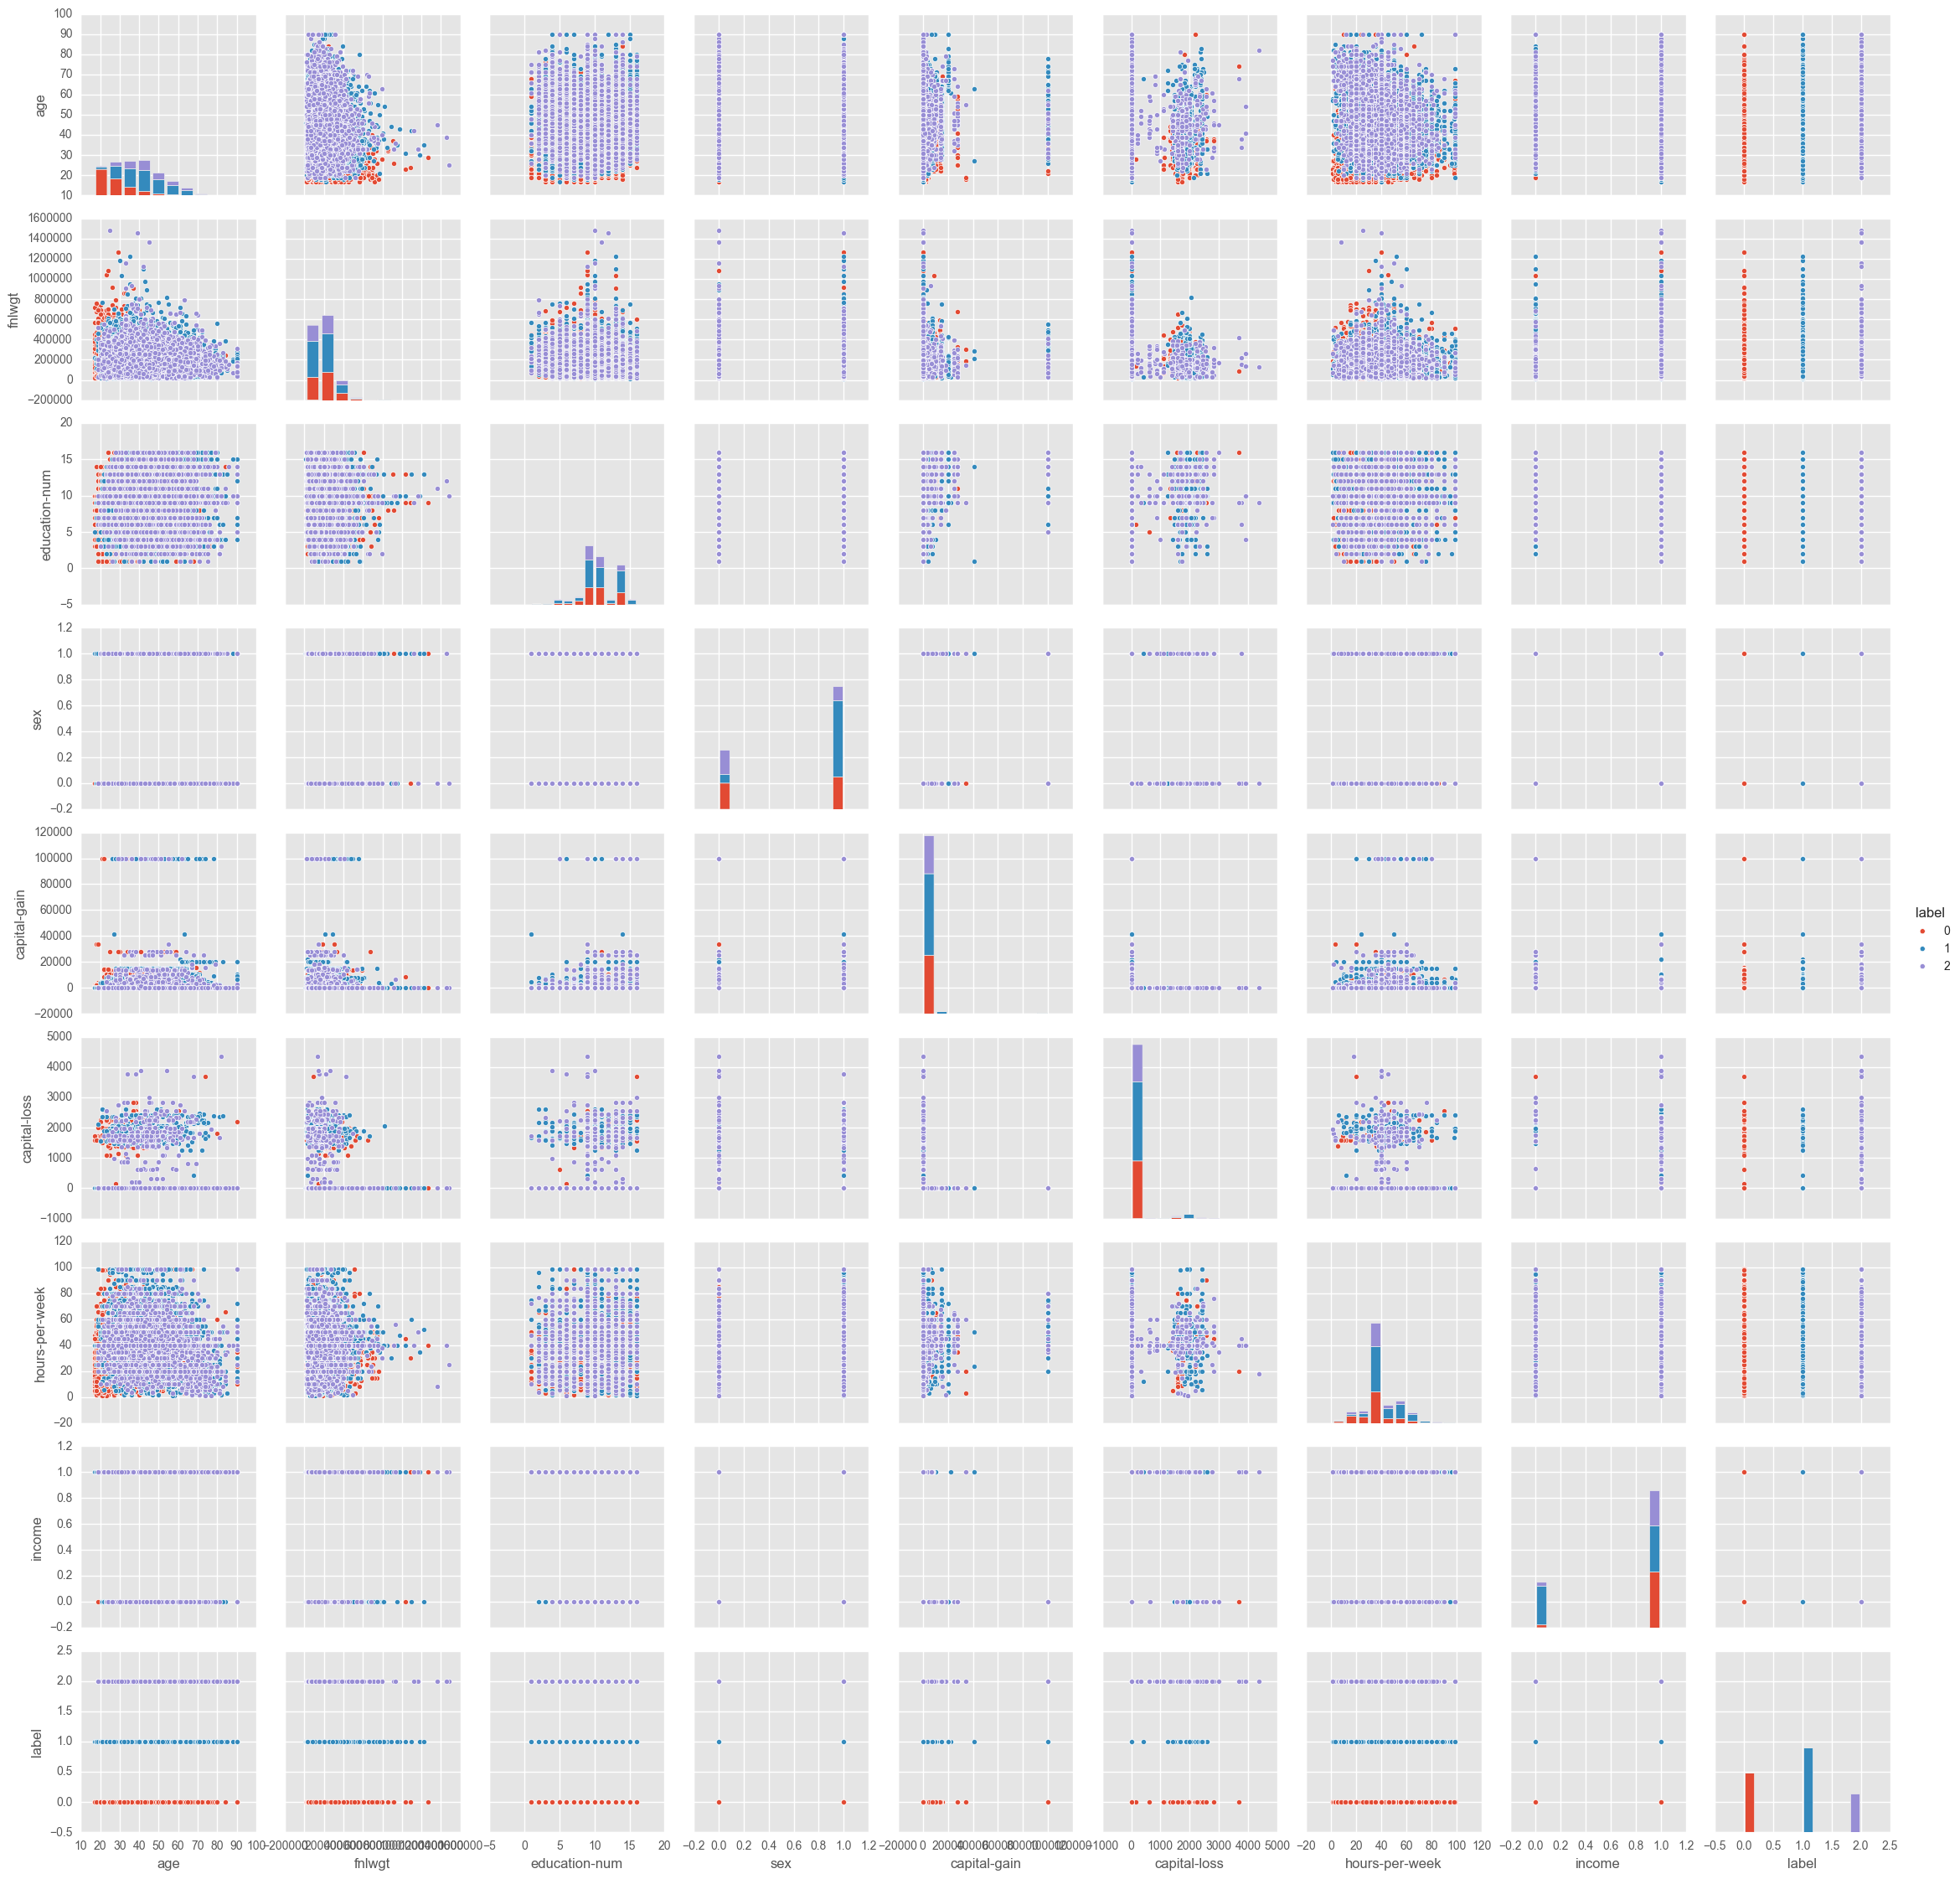

In [84]:
sns.pairplot(ndf, hue='label')
plt.show()

In [81]:
data.label.value_counts()

1    13980
0     9796
2     6386
Name: label, dtype: int64